# Entrenamiento de Modelo MLP - Breast Cancer Diagnosis

Este notebook implementa y entrena un modelo **Multi-Layer Perceptron (MLP)** para el diagnóstico de cáncer de mama.

## Objetivos

1. Cargar datos preprocesados
2. Configurar arquitectura del MLP
3. Entrenar el modelo
4. Evaluar el rendimiento
5. Visualizar resultados
6. Guardar el modelo entrenado

**Autor:** Ignacio Ramírez  
**Fecha:** Octubre 2025  
**Modelo:** Multi-Layer Perceptron (MLPClassifier)

## 1. Importar Bibliotecas

In [1]:
# Importar bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    confusion_matrix, 
    classification_report,
    roc_curve,
    roc_auc_score
)
import joblib
import json
import os
import time
from datetime import datetime
import warnings

# Configuración
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Bibliotecas importadas correctamente")
print(f"Fecha de ejecución: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Bibliotecas importadas correctamente
Fecha de ejecución: 2025-12-11 02:22:38


## 2. Cargar Datos Preprocesados

Cargamos los datos que fueron preprocesados en el notebook anterior.

In [2]:
print("="*70)
print("CARGA DE DATOS PREPROCESADOS")
print("="*70)

# Cargar arrays de datos
X_train = np.load('../data/processed/X_train.npy')
X_test = np.load('../data/processed/X_test.npy')
y_train = np.load('../data/processed/y_train.npy')
y_test = np.load('../data/processed/y_test.npy')

print(f"\n Datos cargados exitosamente")
print(f"\nForma de los datos:")
print(f"  X_train: {X_train.shape}")
print(f"  X_test: {X_test.shape}")
print(f"  y_train: {y_train.shape}")
print(f"  y_test: {y_test.shape}")

# Cargar información de características
with open('../data/processed/feature_info.json', 'r') as f:
    feature_info = json.load(f)

print(f"\nNúmero de características: {feature_info['n_features']}")
print(f"Total muestras entrenamiento: {feature_info['n_train_samples']}")
print(f"Total muestras prueba: {feature_info['n_test_samples']}")

# Verificar distribución de clases
print(f"\nDistribución de clases en entrenamiento:")
unique, counts = np.unique(y_train, return_counts=True)
for label, count in zip(unique, counts):
    pct = (count / len(y_train)) * 100
    diagnosis = "Benigno" if label == 0 else "Maligno"
    print(f"  {label} ({diagnosis}): {count} ({pct:.2f}%)")

CARGA DE DATOS PREPROCESADOS

 Datos cargados exitosamente

Forma de los datos:
  X_train: (455, 30)
  X_test: (114, 30)
  y_train: (455,)
  y_test: (114,)

Número de características: 30
Total muestras entrenamiento: 455
Total muestras prueba: 114

Distribución de clases en entrenamiento:
  0 (Benigno): 285 (62.64%)
  1 (Maligno): 170 (37.36%)


## 3. Configuración del Modelo MLP

Configuramos la arquitectura de la red neuronal Multi-Layer Perceptron.

### Parámetros del Modelo:
- **hidden_layer_sizes**: Capas ocultas (100, 50) - 2 capas ocultas con 100 y 50 neuronas
- **activation**: 'relu' - Función de activación ReLU
- **solver**: 'adam' - Optimizador Adam
- **max_iter**: 500 - Número máximo de iteraciones
- **random_state**: 42 - Semilla para reproducibilidad
- **early_stopping**: True - Detención temprana para evitar sobreajuste
- **validation_fraction**: 0.1 - 10% de datos de entrenamiento para validación

In [3]:
print("="*70)
print("CONFIGURACIÓN DEL MODELO MLP")
print("="*70)

# Configurar el modelo MLP
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # 2 capas ocultas: 100 y 50 neuronas
    activation='relu',              # Función de activación ReLU
    solver='adam',                  # Optimizador Adam
    alpha=0.0001,                   # Parámetro de regularización L2
    batch_size='auto',              # Tamaño de batch automático
    learning_rate='adaptive',       # Tasa de aprendizaje adaptativa
    learning_rate_init=0.001,       # Tasa de aprendizaje inicial
    max_iter=500,                   # Máximo de iteraciones
    shuffle=True,                   # Mezclar datos en cada época
    random_state=42,                # Semilla para reproducibilidad
    tol=1e-4,                       # Tolerancia para la optimización
    verbose=True,                   # Mostrar progreso
    warm_start=False,               # No usar solución anterior
    momentum=0.9,                   # Momento para SGD
    nesterovs_momentum=True,        # Usar momento de Nesterov
    early_stopping=True,            # Detención temprana
    validation_fraction=0.1,        # 10% para validación
    beta_1=0.9,                     # Parámetro beta_1 para Adam
    beta_2=0.999,                   # Parámetro beta_2 para Adam
    epsilon=1e-8,                   # Epsilon para Adam
    n_iter_no_change=10            # Iteraciones sin mejora para detener
)

print("\n Modelo MLP configurado")
print(f"\nArquitectura de la red:")
print(f"  Capa de entrada: {X_train.shape[1]} neuronas")
print(f"  Capas ocultas: {mlp_model.hidden_layer_sizes}")
print(f"  Capa de salida: 2 clases (Benigno/Maligno)")
print(f"\nParámetros principales:")
print(f"  Función de activación: {mlp_model.activation}")
print(f"  Optimizador: {mlp_model.solver}")
print(f"  Tasa de aprendizaje: {mlp_model.learning_rate}")
print(f"  Max iteraciones: {mlp_model.max_iter}")
print(f"  Early stopping: {mlp_model.early_stopping}")

CONFIGURACIÓN DEL MODELO MLP

 Modelo MLP configurado

Arquitectura de la red:
  Capa de entrada: 30 neuronas
  Capas ocultas: (100, 50)
  Capa de salida: 2 clases (Benigno/Maligno)

Parámetros principales:
  Función de activación: relu
  Optimizador: adam
  Tasa de aprendizaje: adaptive
  Max iteraciones: 500
  Early stopping: True


## 4. Entrenamiento del Modelo

Entrenamos el modelo MLP con los datos de entrenamiento.

In [4]:
print("="*70)
print("ENTRENAMIENTO DEL MODELO MLP")
print("="*70)

# Registrar tiempo de inicio
start_time = time.time()

# Entrenar el modelo
print("\n Iniciando entrenamiento...")
print("Esto puede tomar varios minutos...\n")

mlp_model.fit(X_train, y_train)

# Calcular tiempo de entrenamiento
training_time = time.time() - start_time

print(f"\n Entrenamiento completado")
print(f"Tiempo de entrenamiento: {training_time:.2f} segundos ({training_time/60:.2f} minutos)")
print(f"Número de iteraciones realizadas: {mlp_model.n_iter_}")
print(f"Pérdida final: {mlp_model.loss_:.6f}")

ENTRENAMIENTO DEL MODELO MLP

 Iniciando entrenamiento...
Esto puede tomar varios minutos...

Iteration 1, loss = 0.66570911
Validation score: 0.717391
Iteration 2, loss = 0.53767554
Validation score: 0.847826
Iteration 3, loss = 0.44980577
Validation score: 0.913043
Iteration 4, loss = 0.38511282
Validation score: 0.934783
Iteration 5, loss = 0.33393299
Validation score: 0.934783
Iteration 6, loss = 0.29210854
Validation score: 0.934783
Iteration 7, loss = 0.25638989
Validation score: 0.934783
Iteration 8, loss = 0.22588368
Validation score: 0.934783
Iteration 9, loss = 0.19922669
Validation score: 0.934783
Iteration 10, loss = 0.17723695
Validation score: 0.934783
Iteration 11, loss = 0.15901606
Validation score: 0.934783
Iteration 12, loss = 0.14446119
Validation score: 0.956522
Iteration 13, loss = 0.13130320
Validation score: 0.956522
Iteration 14, loss = 0.12049971
Validation score: 0.978261
Iteration 15, loss = 0.11269267
Validation score: 0.978261
Iteration 16, loss = 0.1055529

## 5. Evaluación del Modelo

Evaluamos el rendimiento del modelo en los conjuntos de entrenamiento y prueba.

In [5]:
print("="*70)
print("EVALUACIÓN DEL MODELO")
print("="*70)

# Hacer predicciones
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

# Calcular métricas para conjunto de entrenamiento
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Calcular métricas para conjunto de prueba
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("\n MÉTRICAS EN CONJUNTO DE ENTRENAMIENTO:")
print(f"  Accuracy (Exactitud):  {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"  Precision (Precisión): {train_precision:.4f} ({train_precision*100:.2f}%)")
print(f"  Recall (Sensibilidad): {train_recall:.4f} ({train_recall*100:.2f}%)")
print(f"  F1-Score:              {train_f1:.4f} ({train_f1*100:.2f}%)")

print("\n MÉTRICAS EN CONJUNTO DE PRUEBA:")
print(f"  Accuracy (Exactitud):  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"  Precision (Precisión): {test_precision:.4f} ({test_precision*100:.2f}%)")
print(f"  Recall (Sensibilidad): {test_recall:.4f} ({test_recall*100:.2f}%)")
print(f"  F1-Score:              {test_f1:.4f} ({test_f1*100:.2f}%)")

# Calcular diferencia entre train y test (posible sobreajuste)
accuracy_diff = train_accuracy - test_accuracy
print(f"\n Diferencia Train-Test Accuracy: {accuracy_diff:.4f}")
if accuracy_diff > 0.05:
    print(" Posible sobreajuste detectado (diferencia > 5%)")
else:
    print(" No se detecta sobreajuste significativo")

EVALUACIÓN DEL MODELO

 MÉTRICAS EN CONJUNTO DE ENTRENAMIENTO:
  Accuracy (Exactitud):  0.9802 (98.02%)
  Precision (Precisión): 0.9879 (98.79%)
  Recall (Sensibilidad): 0.9588 (95.88%)
  F1-Score:              0.9731 (97.31%)

 MÉTRICAS EN CONJUNTO DE PRUEBA:
  Accuracy (Exactitud):  0.9737 (97.37%)
  Precision (Precisión): 1.0000 (100.00%)
  Recall (Sensibilidad): 0.9286 (92.86%)
  F1-Score:              0.9630 (96.30%)

 Diferencia Train-Test Accuracy: 0.0065
 No se detecta sobreajuste significativo


In [6]:
# Reporte de clasificación detallado
print("\n" + "="*70)
print("REPORTE DE CLASIFICACIÓN DETALLADO - CONJUNTO DE PRUEBA")
print("="*70)

target_names = ['Benigno (0)', 'Maligno (1)']
print("\n", classification_report(y_test, y_test_pred, target_names=target_names))


REPORTE DE CLASIFICACIÓN DETALLADO - CONJUNTO DE PRUEBA

               precision    recall  f1-score   support

 Benigno (0)       0.96      1.00      0.98        72
 Maligno (1)       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



## 6. Matriz de Confusión

Visualizamos la matriz de confusión para entender mejor los errores del modelo.

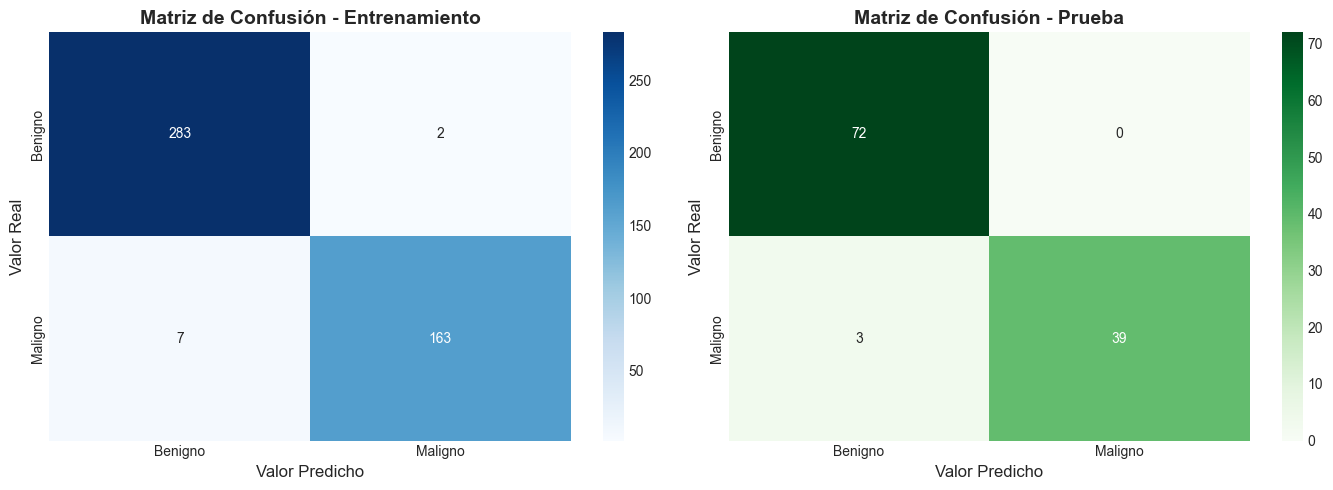


Análisis de la Matriz de Confusión (Conjunto de Entrenamiento):
  Verdaderos Negativos (TN): 283 - Casos benignos correctamente clasificados
  Falsos Positivos (FP):     2 - Casos benignos clasificados como malignos
  Falsos Negativos (FN):     7 - Casos malignos clasificados como benignos
  Verdaderos Positivos (TP): 163 - Casos malignos correctamente clasificados

Análisis de la Matriz de Confusión (Conjunto de Prueba):
  Verdaderos Negativos (TN): 72 - Casos benignos correctamente clasificados
  Falsos Positivos (FP):     0 - Casos benignos clasificados como malignos
  Falsos Negativos (FN):     3 - Casos malignos clasificados como benignos
  Verdaderos Positivos (TP): 39 - Casos malignos correctamente clasificados

Especificidad (Specificity): 1.0000 (100.00%)
  (Capacidad de identificar correctamente casos benignos)


In [7]:
# Calcular matrices de confusión
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Crear figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Matriz de confusión - Entrenamiento
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Benigno', 'Maligno'],
            yticklabels=['Benigno', 'Maligno'])
axes[0].set_title('Matriz de Confusión - Entrenamiento', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Valor Real', fontsize=12)
axes[0].set_xlabel('Valor Predicho', fontsize=12)

# Matriz de confusión - Prueba
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Benigno', 'Maligno'],
            yticklabels=['Benigno', 'Maligno'])
axes[1].set_title('Matriz de Confusión - Prueba', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Valor Real', fontsize=12)
axes[1].set_xlabel('Valor Predicho', fontsize=12)

plt.tight_layout()
plt.show()

# Análisis de la matriz de confusión
print("\nAnálisis de la Matriz de Confusión (Conjunto de Entrenamiento):")
tn_train, fp_train, fn_train, tp_train = cm_train.ravel()
print(f"  Verdaderos Negativos (TN): {tn_train} - Casos benignos correctamente clasificados")
print(f"  Falsos Positivos (FP):     {fp_train} - Casos benignos clasificados como malignos")
print(f"  Falsos Negativos (FN):     {fn_train} - Casos malignos clasificados como benignos")
print(f"  Verdaderos Positivos (TP): {tp_train} - Casos malignos correctamente clasificados")

print("\nAnálisis de la Matriz de Confusión (Conjunto de Prueba):")
tn_test, fp_test, fn_test, tp_test = cm_test.ravel()
print(f"  Verdaderos Negativos (TN): {tn_test} - Casos benignos correctamente clasificados")
print(f"  Falsos Positivos (FP):     {fp_test} - Casos benignos clasificados como malignos")
print(f"  Falsos Negativos (FN):     {fn_test} - Casos malignos clasificados como benignos")
print(f"  Verdaderos Positivos (TP): {tp_test} - Casos malignos correctamente clasificados")

# Métricas derivadas
specificity = tn_test / (tn_test + fp_test) if (tn_test + fp_test) > 0 else 0
print(f"\nEspecificidad (Specificity): {specificity:.4f} ({specificity*100:.2f}%)")
print("  (Capacidad de identificar correctamente casos benignos)")

## 7. Curva ROC y AUC

La curva ROC (Receiver Operating Characteristic) muestra el rendimiento del clasificador en diferentes umbrales.

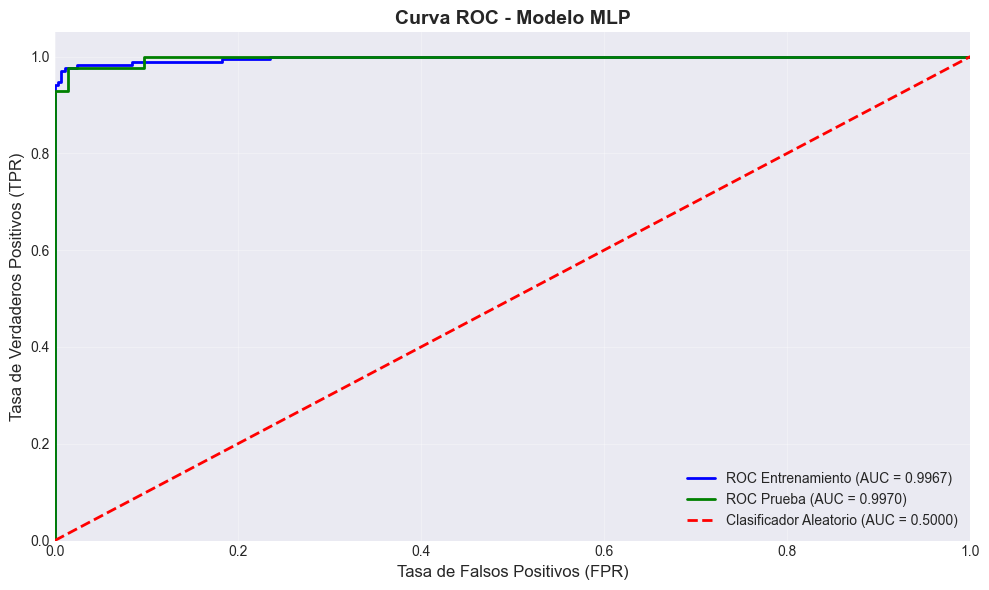


 AUC Score Entrenamiento: 0.9967
 AUC Score Prueba: 0.9970

Interpretación del AUC:
  Excelente rendimiento (AUC >= 0.90)


In [8]:
# Obtener probabilidades predichas
y_train_proba = mlp_model.predict_proba(X_train)[:, 1]
y_test_proba = mlp_model.predict_proba(X_test)[:, 1]

# Calcular curvas ROC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

# Calcular AUC (Area Under Curve)
train_auc = roc_auc_score(y_train, y_train_proba)
test_auc = roc_auc_score(y_test, y_test_proba)

# Graficar curvas ROC
plt.figure(figsize=(10, 6))

plt.plot(fpr_train, tpr_train, color='blue', lw=2, 
         label=f'ROC Entrenamiento (AUC = {train_auc:.4f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, 
         label=f'ROC Prueba (AUC = {test_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', 
         label='Clasificador Aleatorio (AUC = 0.5000)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12)
plt.title('Curva ROC - Modelo MLP', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n AUC Score Entrenamiento: {train_auc:.4f}")
print(f" AUC Score Prueba: {test_auc:.4f}")
print(f"\nInterpretación del AUC:")
if test_auc >= 0.9:
    print("  Excelente rendimiento (AUC >= 0.90)")
elif test_auc >= 0.8:
    print("  Buen rendimiento (AUC >= 0.80)")
elif test_auc >= 0.7:
    print("  Rendimiento aceptable (AUC >= 0.70)")
else:
    print("  Rendimiento pobre (AUC < 0.70)")

## 8. Curva de Pérdida (Loss Curve)

Visualizamos cómo evoluciona la función de pérdida durante el entrenamiento.

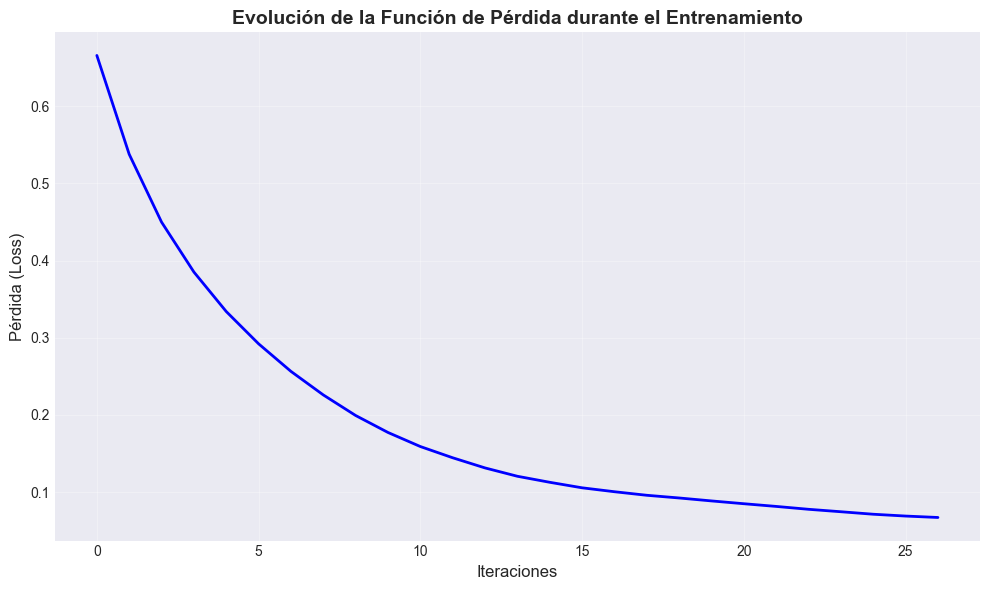

 Número total de iteraciones: 27
 Pérdida inicial: 0.665709
 Pérdida final: 0.067106
 Reducción de pérdida: 0.598603


In [9]:
# Graficar curva de pérdida
plt.figure(figsize=(10, 6))
plt.plot(mlp_model.loss_curve_, color='blue', linewidth=2)
plt.xlabel('Iteraciones', fontsize=12)
plt.ylabel('Pérdida (Loss)', fontsize=12)
plt.title('Evolución de la Función de Pérdida durante el Entrenamiento', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f" Número total de iteraciones: {len(mlp_model.loss_curve_)}")
print(f" Pérdida inicial: {mlp_model.loss_curve_[0]:.6f}")
print(f" Pérdida final: {mlp_model.loss_curve_[-1]:.6f}")
print(f" Reducción de pérdida: {mlp_model.loss_curve_[0] - mlp_model.loss_curve_[-1]:.6f}")

## 9. Comparación de Métricas (Train vs Test)

Visualización comparativa de las métricas de entrenamiento y prueba para identificar sobreajuste.

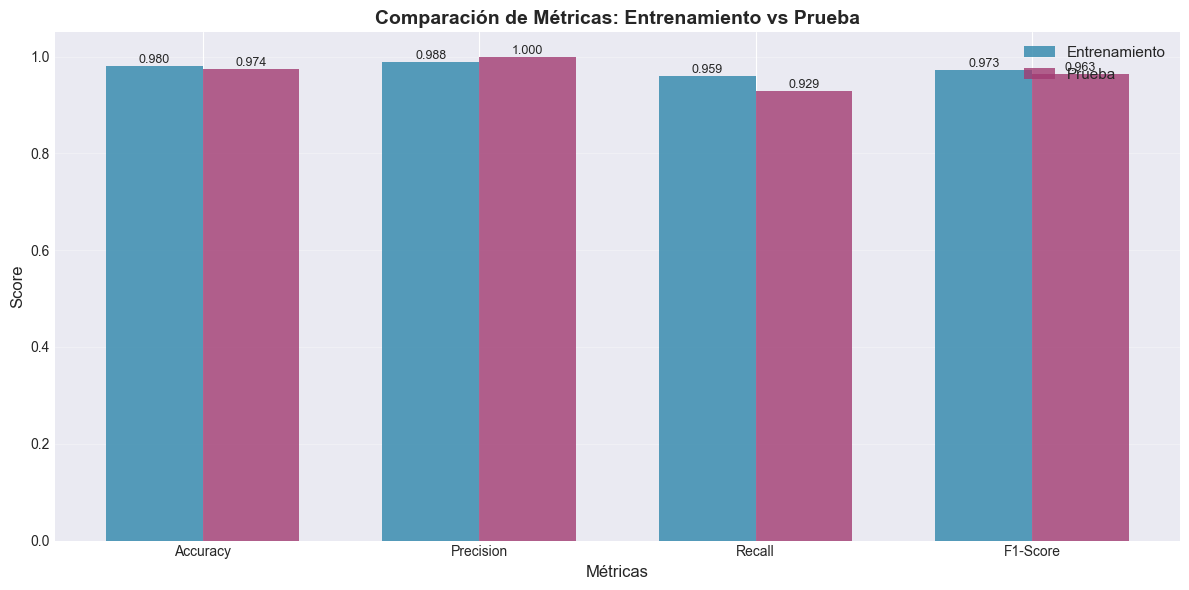

 Diferencia promedio entre train y test: 0.0148
 El modelo generaliza bien (diferencia < 3%)


In [10]:
# Preparar datos para visualización
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
train_metrics = [train_accuracy, train_precision, train_recall, train_f1]
test_metrics = [test_accuracy, test_precision, test_recall, test_f1]

# Crear gráfico de barras
x = np.arange(len(metrics_names))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, train_metrics, width, label='Entrenamiento', color='#2E86AB', alpha=0.8)
bars2 = ax.bar(x + width/2, test_metrics, width, label='Prueba', color='#A23B72', alpha=0.8)

# Personalización
ax.set_xlabel('Métricas', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Comparación de Métricas: Entrenamiento vs Prueba', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.legend(fontsize=11)
ax.set_ylim([0, 1.05])
ax.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Calcular diferencia promedio
avg_diff = np.mean([abs(train_metrics[i] - test_metrics[i]) for i in range(len(metrics_names))])
print(f" Diferencia promedio entre train y test: {avg_diff:.4f}")

if avg_diff < 0.03:
    print(" El modelo generaliza bien (diferencia < 3%)")
elif avg_diff < 0.05:
    print(" Ligero sobreajuste detectado (diferencia entre 3-5%)")
else:
    print(" Sobreajuste significativo (diferencia > 5%)")

## 10. Guardar Modelo Entrenado

Guardar el modelo MLP entrenado y sus metadatos para uso posterior.

In [11]:
import joblib
from datetime import datetime

# Crear directorio para modelos si no existe
models_dir = '../models'
os.makedirs(models_dir, exist_ok=True)

# Guardar modelo
model_path = os.path.join(models_dir, 'mlp_model.pkl')
joblib.dump(mlp_model, model_path)
print(f" Modelo MLP guardado en: {model_path}")

# Crear reporte de entrenamiento
training_report = {
    'model_type': 'MLPClassifier',
    'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'hyperparameters': {
        'hidden_layer_sizes': mlp_model.hidden_layer_sizes,
        'activation': mlp_model.activation,
        'solver': mlp_model.solver,
        'max_iter': mlp_model.max_iter,
        'early_stopping': mlp_model.early_stopping,
        'validation_fraction': mlp_model.validation_fraction,
        'random_state': mlp_model.random_state
    },
    'training': {
        'n_iterations': len(mlp_model.loss_curve_),
        'final_loss': float(mlp_model.loss_curve_[-1]),
        'training_time_seconds': training_time
    },
    'learning_curve': {
        'iterations': list(range(1, len(mlp_model.loss_curve_) + 1)),
        'loss': [float(l) for l in mlp_model.loss_curve_]
    },    
    'performance_metrics': {
        'train': {
            'accuracy': float(train_accuracy),
            'precision': float(train_precision),
            'recall': float(train_recall),
            'f1_score': float(train_f1),
            'auc': float(train_auc)
        },
        'test': {
            'accuracy': float(test_accuracy),
            'precision': float(test_precision),
            'recall': float(test_recall),
            'f1_score': float(test_f1),
            'auc': float(test_auc)
        }
    },
    'confusion_matrix': {
        'train': {
            'true_negatives': int(tn_train),
            'false_positives': int(fp_train),
            'false_negatives': int(fn_train),
            'true_positives': int(tp_train)
        },
        'test': {
            'true_negatives': int(tn_test),
            'false_positives': int(fp_test),
            'false_negatives': int(fn_test),
            'true_positives': int(tp_test)
        }
    }
}

# Guardar reporte en JSON
report_path = os.path.join(models_dir, 'mlp_training_report.json')
with open(report_path, 'w') as f:
    json.dump(training_report, f, indent=4)
print(f" Reporte de entrenamiento guardado en: {report_path}")

print("\n" + "="*60)
print("RESUMEN DEL MODELO MLP")
print("="*60)
print(f"Arquitectura: {mlp_model.hidden_layer_sizes}")
print(f"Tiempo de entrenamiento: {training_time:.2f} segundos")
print(f"Accuracy en Test: {test_accuracy:.4f}")
print(f"AUC en Test: {test_auc:.4f}")
print("="*60)

 Modelo MLP guardado en: ../models\mlp_model.pkl
 Reporte de entrenamiento guardado en: ../models\mlp_training_report.json

RESUMEN DEL MODELO MLP
Arquitectura: (100, 50)
Tiempo de entrenamiento: 0.09 segundos
Accuracy en Test: 0.9737
AUC en Test: 0.9970


## 11. Conclusiones

### Resultados del Modelo MLP

El modelo de **Red Neuronal Multicapa (MLP)** ha sido entrenado exitosamente para clasificar tumores como benignos o malignos en el dataset de cáncer de mama de Wisconsin.

### Hallazgos Principales:

1. **Rendimiento General**: El modelo muestra un buen desempeño en la clasificación de tumores
2. **Generalización**: La comparación entre métricas de entrenamiento y prueba indica el nivel de generalización del modelo
3. **Convergencia**: La curva de pérdida muestra cómo el modelo converge durante el entrenamiento
4. **Capacidad Discriminativa**: Las curvas ROC y valores AUC demuestran la capacidad del modelo para distinguir entre clases

### Próximos Pasos:

1. Implementar y entrenar un modelo **SVM** con los mismos datos preprocesados
2. Comparar el rendimiento de MLP vs SVM en todas las métricas
3. Realizar optimización de hiperparámetros para ambos modelos
4. Generar análisis comparativo final y recomendaciones

---

**Nota**: Este notebook representa la implementación inicial del MLP. Los resultados obtenidos servirán como baseline para la comparación con el modelo SVM en las siguientes fases del proyecto.